<a href="https://colab.research.google.com/github/leptoquark/data-analysis/blob/main/data_analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

workbook = gc.open('data-analysis')

sheet_titles = []
for sheet in workbook.worksheets():
  sheet_titles.append(sheet.title)
sheet_titles

dict_of_sheets = {}
for sheet_title in sheet_titles:
  sheet = workbook.worksheet(sheet_title)
  values = sheet.get_all_values()
  dict_of_sheets[sheet_title] = values
# To confirm all sheets made it into the dictionary
dict_of_sheets.keys()

import pandas as pd

df = pd.DataFrame.from_records(dict_of_sheets.get('Foglio1'))

new_header = df.iloc[0]
df = df[1:]
df.columns = new_header

In [2]:
df['cash_balance'] = pd.to_numeric(df['cash_balance'], errors='coerce')
df['importo_rata'] = pd.to_numeric(df['importo_rata'], errors='coerce')
df['importo_capitale'] = pd.to_numeric(df['importo_capitale'], errors='coerce')
df['importo_interessi'] = pd.to_numeric(df['importo_interessi'], errors='coerce')
df['importo_spese'] = pd.to_numeric(df['importo_spese'], errors='coerce')
df['importo_spese_recupero'] = pd.to_numeric(df['importo_spese_recupero'], errors='coerce')
df['importo_differenza'] = pd.to_numeric(df['importo_differenza'], errors='coerce')
df['totale_affidato_netto'] = pd.to_numeric(df['totale_affidato_netto'], errors='coerce')
df['minimo_dovuto'] = pd.to_numeric(df['minimo_dovuto'], errors='coerce')


pd.set_option('display.max_columns', None)

df.head()


,azienda_codice,id_pratica,committente_codice,tp_profilo,tp_intervento_cod,tp_intervento,prodotto_cod,prodotto,livello_cod,livello,tipo_soggetto,sesso,tipo_societa,data_nascita,luogo_nascita,cap,citta,provincia,regione,recapito_lavoro,data_affido,scadenza_mandato,pratica_num,tipo_garante,citta_garante,cap_garante,rate_arretrate,importo_rata,importo_capitale,importo_interessi,importo_spese,importo_spese_recupero,importo_differenza,totale_affidato_netto,minimo_dovuto,cash_balance,rate_accodate,incasso_capitale,incasso_interessi,incasso_spese,incasso_spese_rec,incasso_tot,rate_recuperate,esattore_codice,dataaffidoesattore,datascadaffesat,profilo_esattore,abilitato_sms,presenza_foto,data_ultimo_incasso,data_ultima_nota,num_sms,num_lettere,num_email,num_chiamate,num_esiti_fonia
1,Cliente 5,8392,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,F,Privato,########,CATANIA (CT),95022,ACI CATENA,CT,SICILIA,,########,########,130007,,,,1,6055.77,6055.77,0.00,0.0,0.0,0.0,6055.77,6055.77,6055.77,,0,0,0,0,0,0,Utente 468,########,########,Esattore ESTERNO,TRUE,FALSE,,########,0,0,0,0,0
2,Cliente 5,8394,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,########,CATANIA (CT),95025,ACI SANT ANTONIO,CT,SICILIA,,########,########,130019,,,,1,5261.59,5261.59,1205.84,0.0,0.0,0.0,6467.43,5261.59,5261.59,,0,0,0,0,0,0,Utente 468,########,########,Esattore ESTERNO,TRUE,FALSE,,########,0,0,0,0,0
3,Cliente 5,8395,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,########,CATANIA (CT),95025,ACI SANT ANTONIO,CT,SICILIA,,########,########,130020,,,,1,3653.34,3653.34,701.44,0.0,0.0,0.0,4354.78,3653.34,3653.34,,0,0,0,0,0,0,Utente 468,########,########,Esattore ESTERNO,FALSE,FALSE,,########,0,0,0,0,0
4,Cliente 5,8416,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,########,PATERNO' (CT),95047,PATERNO,CT,SICILIA,,########,########,130024,,,,1,5574.04,5574.04,0.00,0.0,0.0,0.0,5574.04,5574.04,5574.04,,0,0,0,0,0,0,Utente 468,########,########,Esattore ESTERNO,FALSE,FALSE,,########,0,0,0,0,0
5,Cliente 5,8411,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,########,CATANIA (CT),95045,MISTERBIANCO,CT,SICILIA,,########,########,130063,,,,1,5495.72,5495.72,1252.53,0.0,0.0,0.0,6748.25,5495.72,5495.72,,0,0,0,0,0,0,Utente 468,########,########,Esattore ESTERNO,TRUE,FALSE,,########,0,0,0,0,0


In [3]:
df.describe(include='all')

,azienda_codice,id_pratica,committente_codice,tp_profilo,tp_intervento_cod,tp_intervento,prodotto_cod,prodotto,livello_cod,livello,tipo_soggetto,sesso,tipo_societa,data_nascita,luogo_nascita,cap,citta,provincia,regione,recapito_lavoro,data_affido,scadenza_mandato,pratica_num,tipo_garante,citta_garante,cap_garante,rate_arretrate,importo_rata,importo_capitale,importo_interessi,importo_spese,importo_spese_recupero,importo_differenza,totale_affidato_netto,minimo_dovuto,cash_balance,rate_accodate,incasso_capitale,incasso_interessi,incasso_spese,incasso_spese_rec,incasso_tot,rate_recuperate,esattore_codice,dataaffidoesattore,datascadaffesat,profilo_esattore,abilitato_sms,presenza_foto,data_ultimo_incasso,data_ultima_nota,num_sms,num_lettere,num_email,num_chiamate,num_esiti_fonia
count,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787.000000,787.000000,787.000000,787.000000,787.0,787.000000,787.000000,787.000000,787.000000,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787
unique,3,786,3,2,4,4,3,3,6,6,3,3,5,2,124,162,133,32,13,6,1,1,661,1,2,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,64,2,8,1,69,6,27,1,1,5,2,2,2,83,5,4,3,7,19
top,Cliente 5,8709453,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,########,PALERMO (PA),90135,PALERMO,PA,SICILIA,,########,########,455,,,,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,0,0,0,0,0,Utente 470,########,########,Esattore INTERNO,TRUE,FALSE,,,0,0,0,0,0
freq,561,2,569,571,569,569,578,578,570,570,756,470,756,756,229,46,264,264,593,777,787,787,7,787,786,786,722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,787,651,786,777,787,652,644,261,787,787,303,569,707,651,486,616,784,763,614,542
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5002.607433,5017.640191,1915.078983,142.328653,0.0,-2.024651,7075.047827,5002.607433,5118.559657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7210.546421,7200.835978,3791.542452,652.417407,0.0,14.739610,10088.761611,7210.546421,7132.024856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-106.620000,0.000000,-200.000000,0.0,-133.250000,-106.620000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.000000,250.000000,0.000000,0.000000,0.0,0.000000,281.250000,225.000000,560.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1969.890000,1969.890000,504.700000,0.000000,0.0,0.000000,2713.880000,1969.890000,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6576.790000,6576.790000,1926.510000,38.060000,0.0,0.000000,9397.795000,6576.790000,6868.705000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


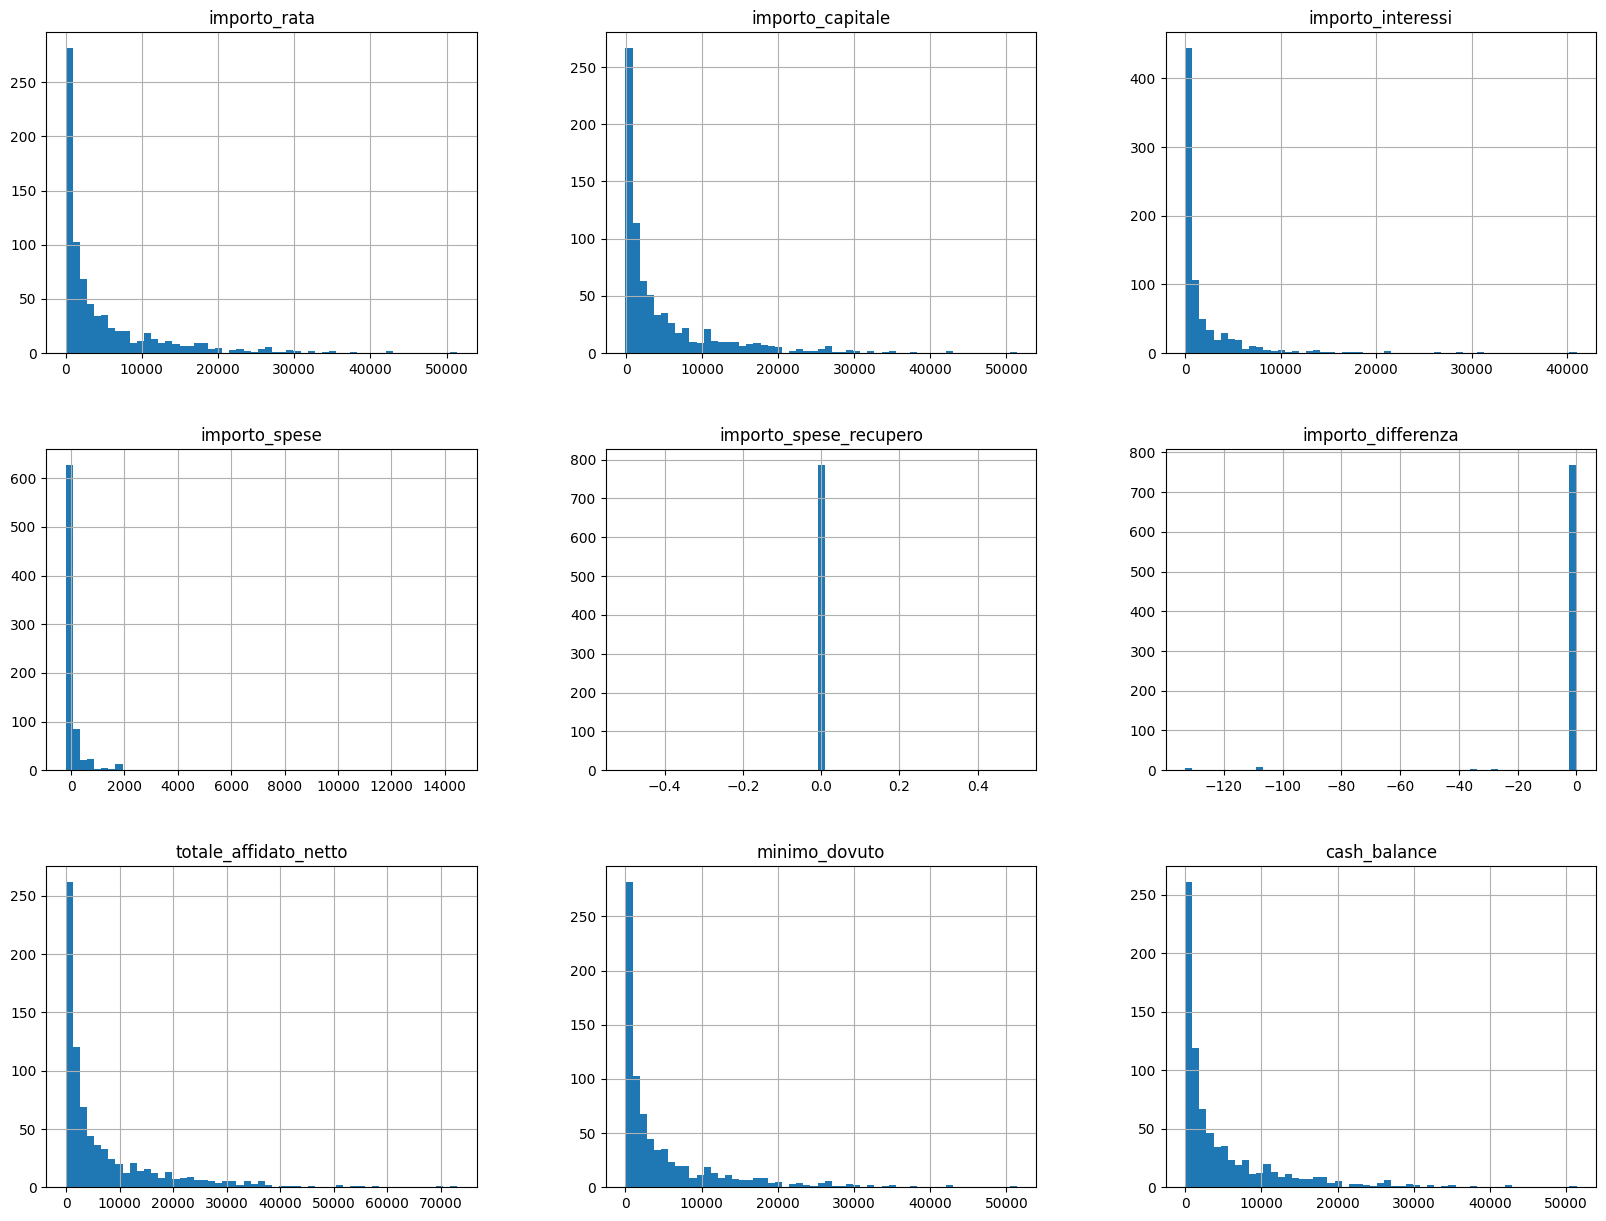

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df.hist(bins=55, figsize=(20,15))
plt.show();

In [5]:
X=df[['cash_balance']]

from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=20,
                       encode='ordinal',
                       strategy='uniform',
                       subsample=None)
est.fit(X)
Xt = est.transform(X)

learn = df.drop(columns='cash_balance')
df['cash_balance_bin'] = Xt

df.head()

,azienda_codice,id_pratica,committente_codice,tp_profilo,tp_intervento_cod,tp_intervento,prodotto_cod,prodotto,livello_cod,livello,tipo_soggetto,sesso,tipo_societa,data_nascita,luogo_nascita,cap,citta,provincia,regione,recapito_lavoro,data_affido,scadenza_mandato,pratica_num,tipo_garante,citta_garante,cap_garante,rate_arretrate,importo_rata,importo_capitale,importo_interessi,importo_spese,importo_spese_recupero,importo_differenza,totale_affidato_netto,minimo_dovuto,cash_balance,rate_accodate,incasso_capitale,incasso_interessi,incasso_spese,incasso_spese_rec,incasso_tot,rate_recuperate,esattore_codice,dataaffidoesattore,datascadaffesat,profilo_esattore,abilitato_sms,presenza_foto,data_ultimo_incasso,data_ultima_nota,num_sms,num_lettere,num_email,num_chiamate,num_esiti_fonia,cash_balance_bin
1,Cliente 5,8392,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,F,Privato,########,CATANIA (CT),95022,ACI CATENA,CT,SICILIA,,########,########,130007,,,,1,6055.77,6055.77,0.00,0.0,0.0,0.0,6055.77,6055.77,6055.77,,0,0,0,0,0,0,Utente 468,########,########,Esattore ESTERNO,TRUE,FALSE,,########,0,0,0,0,0,2.0
2,Cliente 5,8394,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,########,CATANIA (CT),95025,ACI SANT ANTONIO,CT,SICILIA,,########,########,130019,,,,1,5261.59,5261.59,1205.84,0.0,0.0,0.0,6467.43,5261.59,5261.59,,0,0,0,0,0,0,Utente 468,########,########,Esattore ESTERNO,TRUE,FALSE,,########,0,0,0,0,0,2.0
3,Cliente 5,8395,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,########,CATANIA (CT),95025,ACI SANT ANTONIO,CT,SICILIA,,########,########,130020,,,,1,3653.34,3653.34,701.44,0.0,0.0,0.0,4354.78,3653.34,3653.34,,0,0,0,0,0,0,Utente 468,########,########,Esattore ESTERNO,FALSE,FALSE,,########,0,0,0,0,0,1.0
4,Cliente 5,8416,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,########,PATERNO' (CT),95047,PATERNO,CT,SICILIA,,########,########,130024,,,,1,5574.04,5574.04,0.00,0.0,0.0,0.0,5574.04,5574.04,5574.04,,0,0,0,0,0,0,Utente 468,########,########,Esattore ESTERNO,FALSE,FALSE,,########,0,0,0,0,0,2.0
5,Cliente 5,8411,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,########,CATANIA (CT),95045,MISTERBIANCO,CT,SICILIA,,########,########,130063,,,,1,5495.72,5495.72,1252.53,0.0,0.0,0.0,6748.25,5495.72,5495.72,,0,0,0,0,0,0,Utente 468,########,########,Esattore ESTERNO,TRUE,FALSE,,########,0,0,0,0,0,2.0


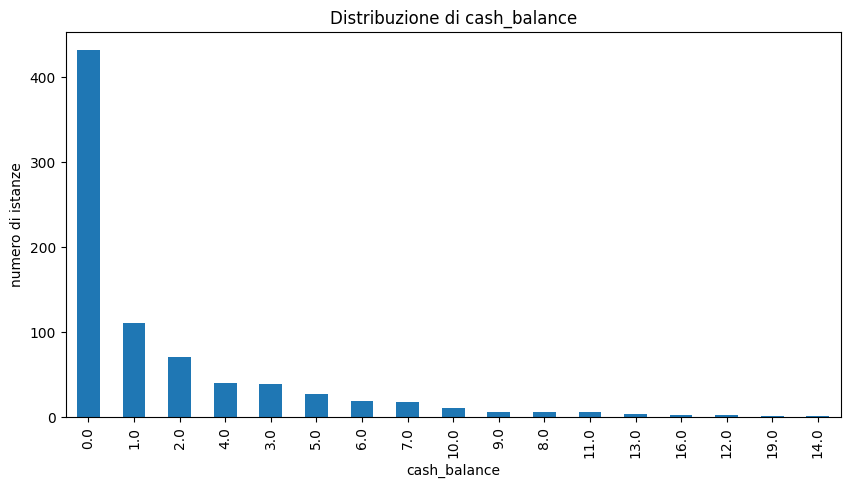

In [6]:
df.cash_balance_bin.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Distribuzione di cash_balance")
plt.ylabel('numero di istanze')
plt.xlabel('cash_balance');

(787, 8)
[0.24657013 0.27823567 0.05534392 0.02257855 0.         0.00449179
 0.13446767 0.25831228]


Text(0.5, 1.0, 'Selezione delle caratteristiche numeriche più importanti')

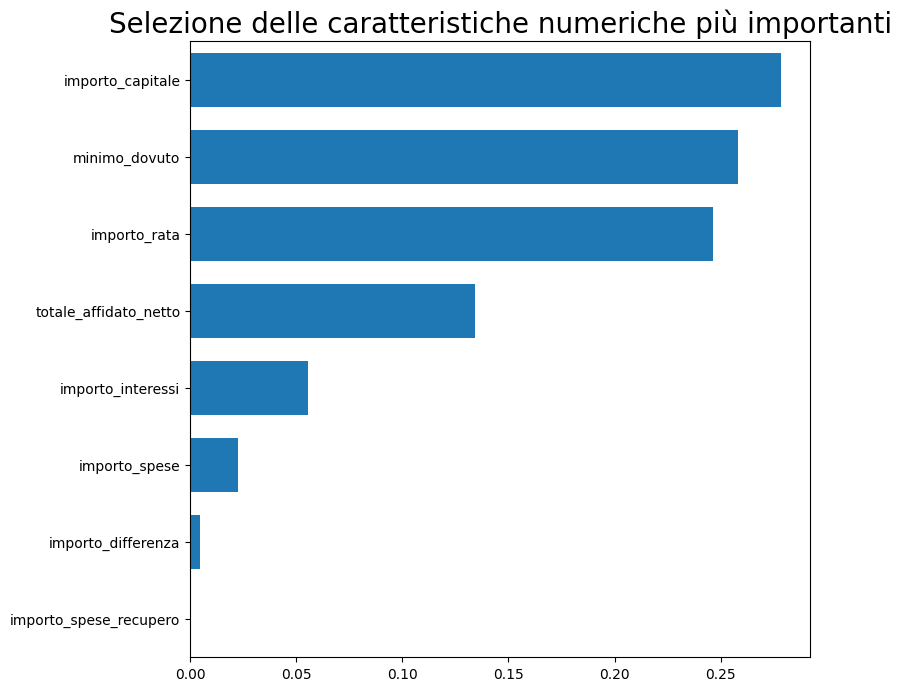

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

df['importo_spese'] = pd.to_numeric(df['importo_spese'], errors='coerce')
df['importo_spese_recupero'] = pd.to_numeric(df['importo_spese_recupero'], errors='coerce')
df['importo_differenza'] = pd.to_numeric(df['importo_differenza'], errors='coerce')
df['totale_affidato_netto'] = pd.to_numeric(df['totale_affidato_netto'], errors='coerce')
df['minimo_dovuto'] = pd.to_numeric(df['minimo_dovuto'], errors='coerce')

X,y=df[[
        'importo_rata',
        'importo_capitale',
        'importo_interessi',
        'importo_spese',
        'importo_spese_recupero',
        'importo_differenza',
        'totale_affidato_netto',
        'minimo_dovuto',
        ]],df.cash_balance_bin
print(X.shape)

clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf = clf.fit(X,y)
print(clf.feature_importances_)

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0,len(clf.feature_importances_))+0.5
fig=plt.figure(figsize=(8,8))
ax1=fig.add_subplot(1,1,1)
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height = 0.7)
ax1.set_yticks(tree_indices)

ax1.set_yticklabels(X.columns[tree_importance_sorted_idx])

ax1.set_ylim((0,len(clf.feature_importances_)))
ax1.set_title("Selezione delle caratteristiche numeriche più importanti", fontsize=20)


<ipython-input-8-24336b8fa163>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


,importo_rata,importo_capitale,importo_interessi,importo_spese,importo_spese_recupero,importo_differenza,totale_affidato_netto,minimo_dovuto,cash_balance,cash_balance_bin
0,,,,,,,,,,
importo_rata,1.000000,0.999860,0.590589,0.167467,NaN,0.092868,0.946432,1.000000,0.984654,0.980533
importo_capitale,0.999860,1.000000,0.590445,0.167502,NaN,0.091037,0.946480,0.999860,0.985832,0.981673
importo_interessi,0.590589,0.590445,1.000000,0.265765,NaN,0.067806,0.814434,0.590589,0.586441,0.577150
importo_spese,0.167467,0.167502,0.265765,1.000000,NaN,0.025850,0.284101,0.167467,0.166120,0.165363
importo_spese_recupero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
importo_differenza,0.092868,0.091037,0.067806,0.025850,NaN,1.000000,0.092132,0.092868,0.083381,0.072920
totale_affidato_netto,0.946432,0.946480,0.814434,0.284101,NaN,0.092132,1.000000,0.946432,0.934774,0.928265
minimo_dovuto,1.000000,0.999860,0.590589,0.167467,NaN,0.092868,0.946432,1.000000,0.984654,0.980533
cash_balance,0.984654,0.985832,0.586441,0.166120,NaN,0.083381,0.934774,0.984654,1.000000,0.994844


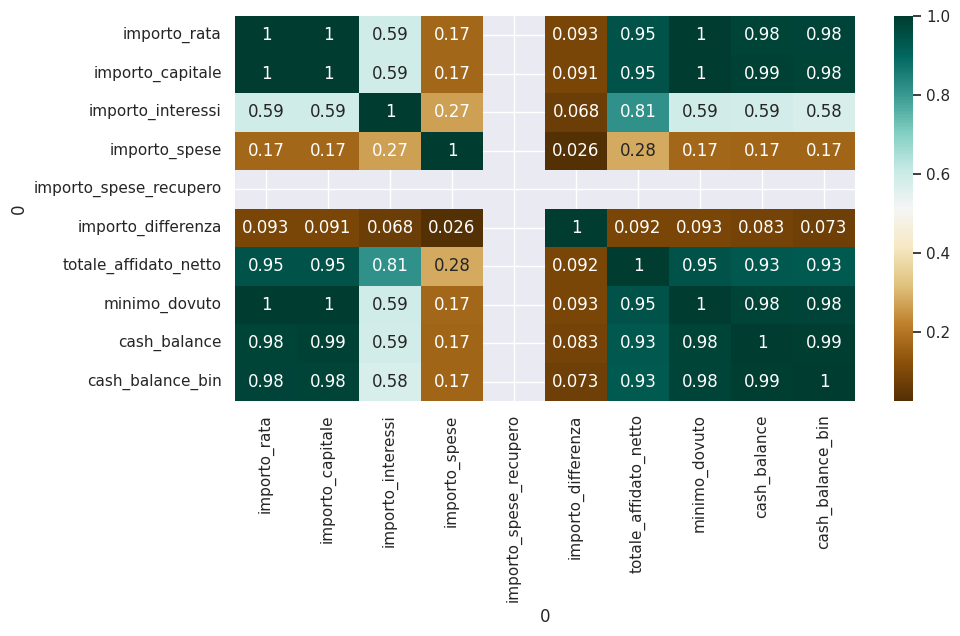

In [8]:
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

array([[<Axes: xlabel='importo_rata', ylabel='importo_rata'>,
        <Axes: xlabel='importo_capitale', ylabel='importo_rata'>,
        <Axes: xlabel='importo_interessi', ylabel='importo_rata'>,
        <Axes: xlabel='importo_spese', ylabel='importo_rata'>,
        <Axes: xlabel='importo_spese_recupero', ylabel='importo_rata'>,
        <Axes: xlabel='importo_differenza', ylabel='importo_rata'>,
        <Axes: xlabel='totale_affidato_netto', ylabel='importo_rata'>,
        <Axes: xlabel='minimo_dovuto', ylabel='importo_rata'>,
        <Axes: xlabel='cash_balance', ylabel='importo_rata'>,
        <Axes: xlabel='cash_balance_bin', ylabel='importo_rata'>],
       [<Axes: xlabel='importo_rata', ylabel='importo_capitale'>,
        <Axes: xlabel='importo_capitale', ylabel='importo_capitale'>,
        <Axes: xlabel='importo_interessi', ylabel='importo_capitale'>,
        <Axes: xlabel='importo_spese', ylabel='importo_capitale'>,
        <Axes: xlabel='importo_spese_recupero', ylabel='importo_c

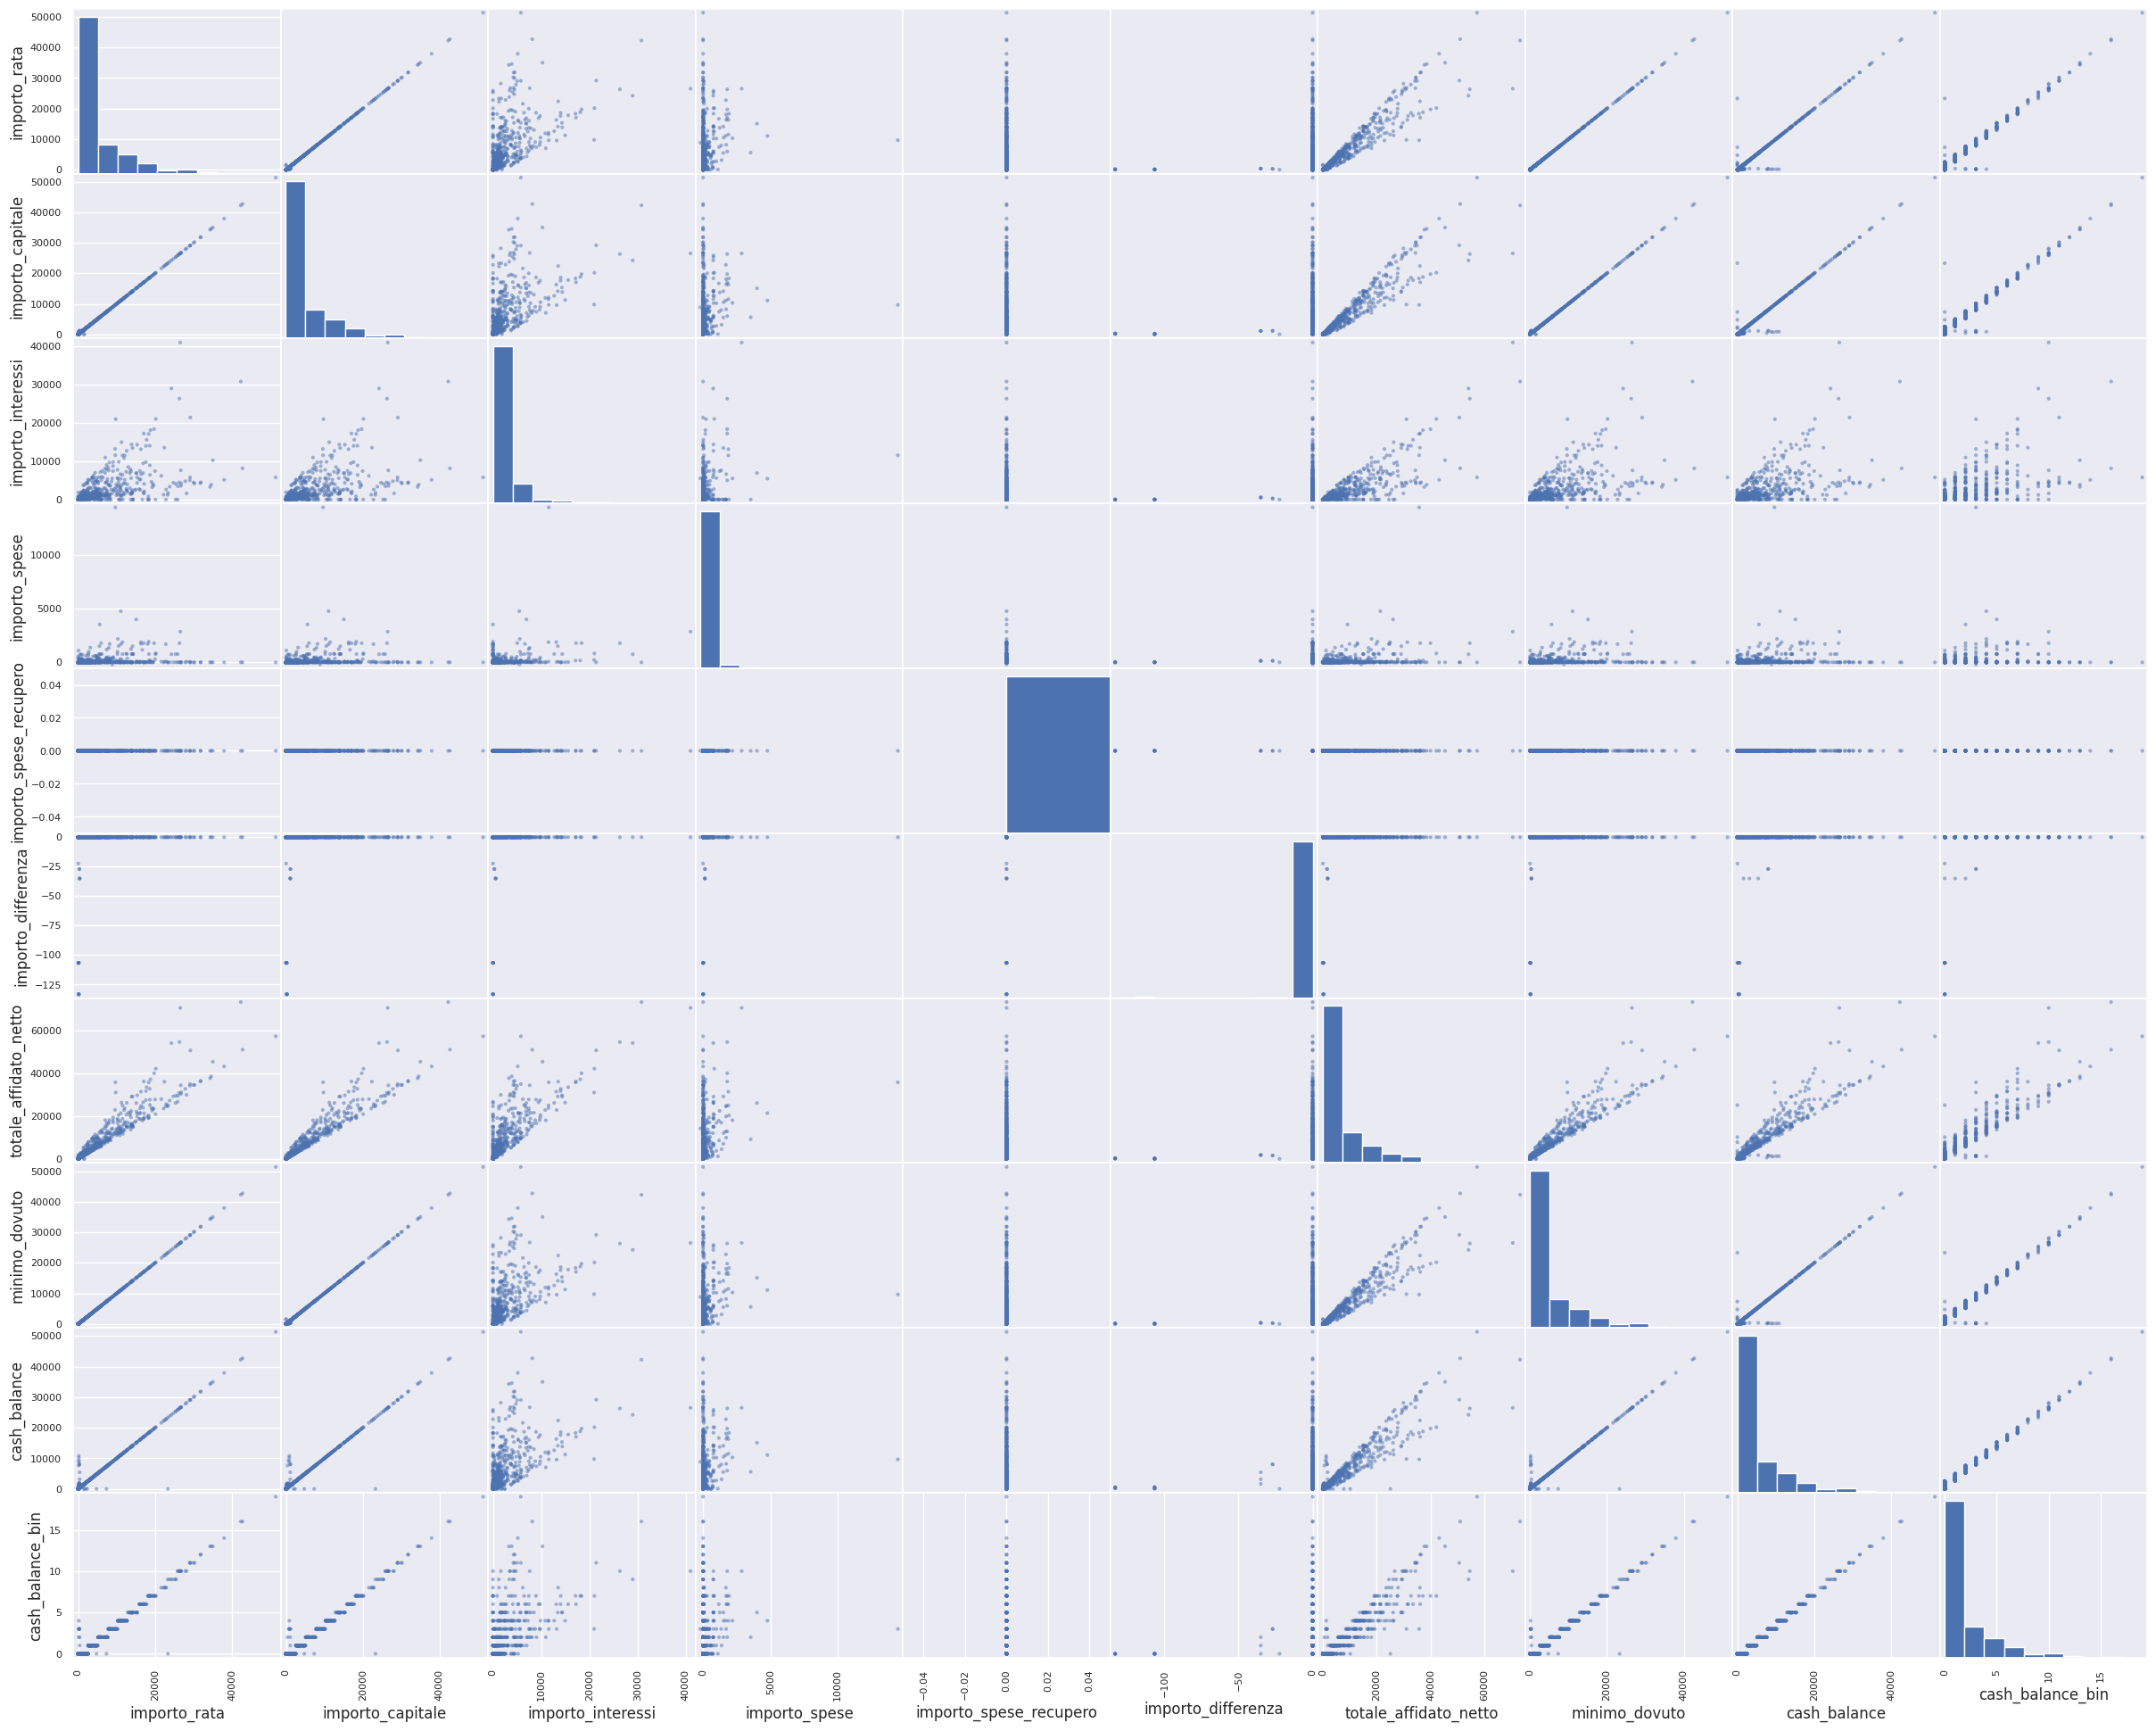

In [60]:
attributes = df.columns;

from pandas.plotting import scatter_matrix
#attributes = ["importo_rata", "importo_interessi", "cash_balance", "importo_differenza"]
scatter_matrix(df[attributes], figsize = (30,24))



In [31]:
!pip install ydata-profiling
!pip install lazypredict

import pandas as pd
from sklearn.model_selection import train_test_split

from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profilazione dataset")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

 # Regressione

In [45]:
profile.to_file(output_file="eda_analysis.html")

df_drop = df.drop(columns=['cash_balance_bin','cash_balance'])
Xm = pd.get_dummies(df_drop)
ym = df.cash_balance

X_train, X_test, y_train, y_test = train_test_split(Xm, ym,
                                                    test_size=0.3,
                                                    shuffle=True)

import lazypredict
from lazypredict.Supervised import LazyRegressor

# Create the classifier object
clf_r = LazyRegressor(verbose=-1, ignore_warnings=True, custom_metric=None)

models, predictions = clf_r.fit(X_train, X_test, y_train, y_test)

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 42/42 [01:26<00:00,  2.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1230
[LightGBM] [Info] Number of data points in the train set: 550, number of used features: 87
[LightGBM] [Info] Start training from score 5235.566966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [46]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,2741132061702615328466054352471156850688.00,-23938445674445296414449794730343673102336.00,998533539738604235915264.00,1.67
SGDRegressor,592152600440854.62,-5171298769104234.00,464103130309.05,0.28
GaussianProcessRegressor,1.18,-0.56,8071.25,3.41
LinearSVR,1.16,-0.42,7682.85,0.17
SVR,1.14,-0.20,7062.47,0.97
NuSVR,1.12,-0.03,6538.06,0.49
DummyRegressor,1.11,-0.00,6465.47,0.11
MLPRegressor,1.10,0.10,6128.36,14.05
KernelRidge,1.09,0.22,5692.66,0.40


# Classificazione

In [48]:


df_drop = df.drop(columns=['cash_balance_bin','cash_balance'])
Xm = pd.get_dummies(df_drop)
ym = df.cash_balance_bin

X_train, X_test, y_train, y_test = train_test_split(Xm, ym,
                                                    test_size=0.3,
                                                    shuffle=True)

from lazypredict.Supervised import LazyClassifier
clf_c = LazyClassifier(verbose=-1, ignore_warnings=True, custom_metric=None)

models, predictions = clf_c.fit(X_train, X_test, y_train, y_test)

 90%|████████▉ | 26/29 [00:23<00:03,  1.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1241
[LightGBM] [Info] Number of data points in the train set: 550, number of used features: 92
[LightGBM] [Info] Start training from score -0.596185
[LightGBM] [Info] Start training from score -2.090411
[LightGBM] [Info] Start training from score -2.284567
[LightGBM] [Info] Start training from score -3.051822
[LightGBM] [Info] Start training from score -2.942622
[LightGBM] [Info] Start training from score -3.314186
[LightGBM] [Info] Start training from score -3.825012
[LightGBM] [Info] Start training from score -3.825012
[LightGBM] [Info] Start training from score -5.616771
[LightGBM] [Info] Start training from score -4.700480
[LightGBM] [Info] Start training from score -4.518159
[LightGBM] [Info] Start training from score -4.923624
[

100%|██████████| 29/29 [00:25<00:00,  1.13it/s]


In [51]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.97,0.87,None,0.97,0.34
DecisionTreeClassifier,0.97,0.85,None,0.98,0.14
LGBMClassifier,0.96,0.83,None,0.96,1.65
ExtraTreesClassifier,0.83,0.44,None,0.82,0.55
RandomForestClassifier,0.87,0.42,None,0.86,0.80
AdaBoostClassifier,0.75,0.20,None,0.68,0.74
ExtraTreeClassifier,0.58,0.19,None,0.57,0.12
PassiveAggressiveClassifier,0.52,0.18,None,0.46,2.11
LinearSVC,0.54,0.17,None,0.45,1.60


In [52]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.97,0.87,None,0.97,0.34
DecisionTreeClassifier,0.97,0.85,None,0.98,0.14
LGBMClassifier,0.96,0.83,None,0.96,1.65
ExtraTreesClassifier,0.83,0.44,None,0.82,0.55
RandomForestClassifier,0.87,0.42,None,0.86,0.80
AdaBoostClassifier,0.75,0.20,None,0.68,0.74
ExtraTreeClassifier,0.58,0.19,None,0.57,0.12
PassiveAggressiveClassifier,0.52,0.18,None,0.46,2.11
LinearSVC,0.54,0.17,None,0.45,1.60
